This notebook generates a 2D initial condition file for the 2D domain.

Plan: Use T+S structure along thalweg from a spinup. Apply to new domain. If spinup T+S is masked and new profile isn't, set T/S equal to value from above?



In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

from salishsea_tools import tidetools,nc_tools

%matplotlib inline

# Initial data

In [2]:
#Spinup data and batyhmetry
#Choose a date (I should do this in a better way with variables...)
date = 'uniform'
old=nc.Dataset('../initial_conditions/TS_uniform.nc')
dspin =old.variables['deptht'][:]

Sspin = old.variables['vosaline'][:]
Tspin = old.variables['votemper'][:]
grid=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

x2d=old.variables['x'][:]
y2d=old.variables['y'][:]

<matplotlib.colorbar.Colorbar instance at 0x7f1cfb62c2d8>

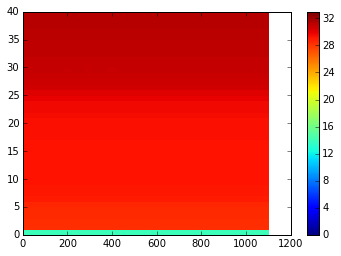

In [6]:

plt.pcolormesh(Sspin[0,:,1,:],vmin=0,vmax=33)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f1cfb482f80>

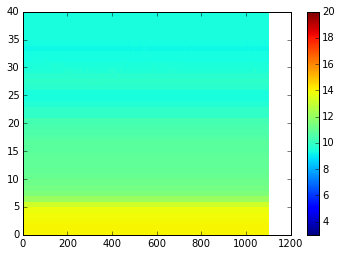

In [7]:
plt.pcolormesh(Tspin[0,:,1,:],vmin=3,vmax=20)
plt.colorbar()

#Mask edges

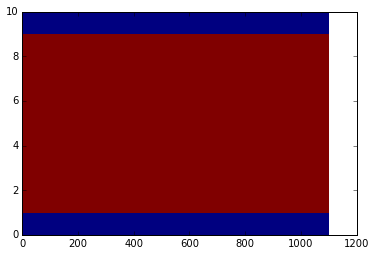

In [8]:
T_y=Tspin
T_y[0,:,0,:]=0
T_y[0,:,-1,:]=0
T_y[0,:,:,0]=0

plt.pcolormesh(T_y[0,0,:,:])

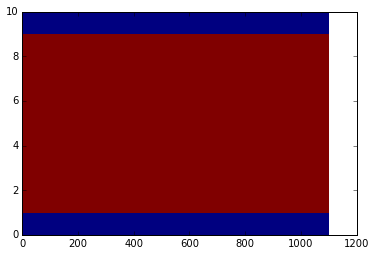

In [9]:
S_y=Sspin
S_y[0,:,0,:]=0
S_y[0,:,-1,:]=0
S_y[0,:,:,0]=0

plt.pcolormesh(S_y[0,0,:,:])

# Save as NETCDF

In [10]:
# build nc file
new_TS = nc.Dataset('../initial_conditions/TS_{}_36.nc'.format(date), 'w')
nc_tools.init_dataset_attrs(
    new_TS, 
    title='2D T+S initialization', 
    notebook_name='Generate 2D T+S-NEMO2.6.ipynb', 
    nc_filepath='/data/nsoontie/MEOPAR/2Ddomain/notebooks/TS_{}.nc'.format(date),
    comment='Salinity and Temperature along Thalweg for 2D domain NEMO 3.6 from {} stratification'.format(date))
new_TS.createDimension('y', 10)
new_TS.createDimension('x', 1100)
new_TS.createDimension('deptht',size = len(dspin))
new_TS.createDimension('time_counter', None)
nc_tools.show_dimensions(new_TS)
# variables
y = new_TS.createVariable('y', 'float32', ('y','x'))
y.long_name = 'spanwise'
y.units = 'metres'
y =y2d 
x = new_TS.createVariable('x', 'float32', ('y','x'))
x.long_name = 'streamwise'
x.units = 'metres'
x = x2d
deptht = new_TS.createVariable('deptht', 'float32', ('deptht'))
deptht.long_name = 'Depth'
deptht.units = 'm'
deptht.positive = 'down'
deptht = dspin
time_counter = new_TS.createVariable('time_counter', 'float32', ('time_counter'))
time_counter.units = 'seconds since 2003-08-09 0:00:00'
time_counter.long_name = 'Time axis'
vosaline = new_TS.createVariable('vosaline', 'float32', 
                               ('time_counter','deptht','y','x'))
vosaline.units = 'none'
vosaline.long_name = 'Practical Salinity'  
vosaline.coordinates = 'x y deptht time_counter'
vosaline.grid = '2D bathy'
vosaline[0] =S_y
votemper = new_TS.createVariable('votemper', 'float32', 
                               ('time_counter','deptht','y','x'))
votemper.units = 'degC'
votemper.long_name = 'Temperature' 
votemper.coordinates = 'nav_lon nav_lat deptht time_counter'
votemper[0] = T_y

file format: NETCDF4
Conventions: CF-1.6
title: 2D T+S initialization
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/salishsea/2d-domain/src/tip/Generate 2D T+S-NEMO2.6.ipynb
references: REQUIRED
history: [2015-08-05 15:38:19] Created netCDF4 zlib=True dataset.
comment: Salinity and Temperature along Thalweg for 2D domain NEMO 3.6 from uniform stratification
<type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 10

<type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 1100

<type 'netCDF4._netCDF4.Dimension'>: name = 'deptht', size = 40

<type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 0



In [8]:
new_TS.close()

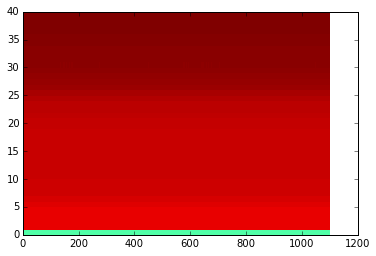

In [11]:
new=nc.Dataset('../initial_conditions/TS_uniform_36.nc')
sal=new.variables['vosaline']
plt.pcolormesh(sal[0,:,1,:])

[10, 34, 40, 0]

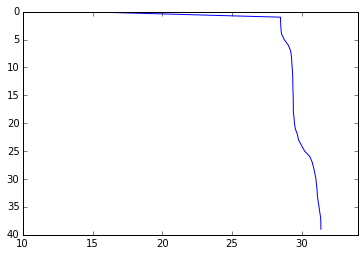

In [33]:
plt.plot(sal[0,:,1,1].T, np.arange(40))
plt.axis([10,34,40,0])